# stretch_eicu (sepsis-pics)


## common


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from common_eicu import *


## patient data


In [5]:
df_patient = pd.read_csv(
    eicu_path('patient.csv.gz'),
)
df_patient.columns


Index(['patientunitstayid', 'patienthealthsystemstayid', 'gender', 'age',
       'ethnicity', 'hospitalid', 'wardid', 'apacheadmissiondx',
       'admissionheight', 'hospitaladmittime24', 'hospitaladmitoffset',
       'hospitaladmitsource', 'hospitaldischargeyear',
       'hospitaldischargetime24', 'hospitaldischargeoffset',
       'hospitaldischargelocation', 'hospitaldischargestatus', 'unittype',
       'unitadmittime24', 'unitadmitsource', 'unitvisitnumber', 'unitstaytype',
       'admissionweight', 'dischargeweight', 'unitdischargetime24',
       'unitdischargeoffset', 'unitdischargelocation', 'unitdischargestatus',
       'uniquepid'],
      dtype='object')

In [6]:
df_patient['gender'].unique()


array(['Female', 'Male', nan, 'Unknown', 'Other'], dtype=object)

## diagnosis data


In [12]:
df_sepsis = pd.read_csv(
    './data/sepsis_eicu.csv.gz',
)
df_sepsis.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115375 entries, 0 to 115374
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   patientunitstayid  115375 non-null  int64 
 1   diagnosisstring    115375 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [13]:
len(df_sepsis[KEY_IDENTITY].unique())


23479

## treatment data


In [18]:
df_treatment = pd.read_csv(
    TREATMENT_PATH,
    nrows=5000,
)
df_treatment.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   treatmentid          5000 non-null   int64 
 1   patientunitstayid    5000 non-null   int64 
 2   treatmentoffset      5000 non-null   int64 
 3   treatmentstring      5000 non-null   object
 4   activeupondischarge  5000 non-null   bool  
dtypes: bool(1), int64(3), object(1)
memory usage: 161.3+ KB


In [6]:
df_treatment[
    (df_treatment['patientunitstayid'] == 242290)
    & (
        df_treatment['treatmentstring'].map(
            lambda s: 'vasopressor' in s
        )
    )
]


,treatmentid,patientunitstayid,treatmentoffset,treatmentstring,activeupondischarge
245,8645242,242290,162,cardiovascular|shock|vasopressors|norepinephri...,False
253,10019133,242290,165,cardiovascular|shock|vasopressors|norepinephri...,True


In [23]:
with open('./data/treatment_strings.txt', 'w') as output_file:
    for string in df_treatment[KEY_TREATMENT_STRING].unique():
        output_file.write(string)
        output_file.write('\n')


## exam data


In [9]:
df_exam = pd.read_csv(
    # './data/exam_eicu_processed.csv.gz',
    EXAM_PATH,
    nrows=100_000,
)
df_exam.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   physicalexamid      100000 non-null  int64 
 1   patientunitstayid   100000 non-null  int64 
 2   physicalexamoffset  100000 non-null  int64 
 3   physicalexampath    100000 non-null  object
 4   physicalexamvalue   100000 non-null  object
 5   physicalexamtext    100000 non-null  object
dtypes: int64(3), object(3)
memory usage: 4.6+ MB


In [12]:
df_exam[
    df_exam[KEY_EXAM_NAME] == (
        'notes/Progress Notes/Physical Exam/Physical Exam'
        '/Neurologic/GCS/10'
    )
]


,physicalexamid,patientunitstayid,physicalexamoffset,physicalexampath,physicalexamvalue,physicalexamtext
10344,5351815,228672,21,notes/Progress Notes/Physical Exam/Physical Ex...,10,10
40987,5636870,181047,31,notes/Progress Notes/Physical Exam/Physical Ex...,10,10
69285,5908334,192574,64,notes/Progress Notes/Physical Exam/Physical Ex...,10,10
90873,6126450,152074,59,notes/Progress Notes/Physical Exam/Physical Ex...,10,10


In [34]:
with open('./data/exam_names.txt', 'w') as output_file:
    # for name in df_exam[KEY_EXAM_NAME].unique():
    #     output_file.write(name)
    #     output_file.write('\n')
    item_columns = ['physicalexampath', 'physicalexamvalue']
    raw_items = df_exam[item_columns].values
    items = np.array([
        f'{path} :: {value}'
        for path, value in raw_items
    ])
    unique_items = np.unique(items)
    for item in unique_items:
        output_file.write(item)
        output_file.write('\n')


## lab data


In [15]:
df_lab = pd.read_csv(
    # './data/lab_eicu_processed.csv.gz',
    LAB_PATH,
    nrows=50000,
)
df_lab.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   labid                    50000 non-null  int64  
 1   patientunitstayid        50000 non-null  int64  
 2   labresultoffset          50000 non-null  int64  
 3   labtypeid                50000 non-null  int64  
 4   labname                  50000 non-null  object 
 5   labresult                49781 non-null  float64
 6   labresulttext            50000 non-null  object 
 7   labmeasurenamesystem     47371 non-null  object 
 8   labmeasurenameinterface  49255 non-null  object 
 9   labresultrevisedoffset   50000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 3.8+ MB


In [15]:
# df_lab[df_lab['patientunitstayid'] == 242505][['patientunitstayid','labname']] \
#     .groupby('labname').count()
# df_lab[
#     (df_lab['patientunitstayid'] == 242505)
#     & (df_lab['labname'].isin(['albumin', '-lymphs']))
# ].sort_values(by='labresultoffset')
# df_lab[
#     df_lab['labname'].map(
#         lambda s: 'wbc' in s.lower()
#     )
# ]['labname'].unique()
df_lab[df_lab['labname'] == 'WBC x 1000'].head()


,labid,patientunitstayid,labresultoffset,labtypeid,labname,labresult,labresulttext,labmeasurenamesystem,labmeasurenameinterface,labresultrevisedoffset
52,54358175,141168,2026,3,WBC x 1000,19.8,19.8,K/mcL,K/mcL,2148
118,56155662,141168,516,3,WBC x 1000,9.8,9.8,K/mcL,K/mcL,524
135,53275575,141168,1133,3,WBC x 1000,14.7,14.7,K/mcL,K/mcL,1196
148,53200536,141178,-280,3,WBC x 1000,7.6,7.6,K/mcL,K/mcL,-216
173,55330219,141179,1487,3,WBC x 1000,8.1,8.1,K/mcL,K/mcL,1546


In [23]:
with open('./data/lab_names.txt', 'w') as output_file:
    for name in df_lab[KEY_LAB_NAME].unique():
        measure = df_lab[df_lab[KEY_LAB_NAME] == name].iat[0, 7]
        output_file.write(name)
        output_file.write(' (')
        output_file.write(
            measure if measure == measure else '?'
        )
        output_file.write(')')
        output_file.write('\n')


## aperiodic


In [22]:
df_aperiodic = pd.read_csv(
    eicu_path('vitalAperiodic.csv.gz'),
    nrows=10000,
)
df_aperiodic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vitalaperiodicid      10000 non-null  int64  
 1   patientunitstayid     10000 non-null  int64  
 2   observationoffset     10000 non-null  int64  
 3   noninvasivesystolic   9971 non-null   float64
 4   noninvasivediastolic  9971 non-null   float64
 5   noninvasivemean       9999 non-null   float64
 6   paop                  1 non-null      float64
 7   cardiacoutput         0 non-null      float64
 8   cardiacinput          0 non-null      float64
 9   svr                   0 non-null      float64
 10  svri                  0 non-null      float64
 11  pvr                   0 non-null      float64
 12  pvri                  0 non-null      float64
dtypes: float64(10), int64(3)
memory usage: 1015.8 KB


In [15]:
len(df_aperiodic[KEY_IDENTITY].unique())


133

## periodic


In [35]:
df_periodic = pd.read_csv(
    eicu_path('vitalPeriodic.csv.gz'),
    nrows=10000,
)
df_periodic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vitalperiodicid    10000 non-null  int64  
 1   patientunitstayid  10000 non-null  int64  
 2   observationoffset  10000 non-null  int64  
 3   temperature        265 non-null    float64
 4   sao2               8075 non-null   float64
 5   heartrate          9995 non-null   float64
 6   respiration        7834 non-null   float64
 7   cvp                3584 non-null   float64
 8   etco2              0 non-null      float64
 9   systemicsystolic   4253 non-null   float64
 10  systemicdiastolic  4252 non-null   float64
 11  systemicmean       4307 non-null   float64
 12  pasystolic         2355 non-null   float64
 13  padiastolic        2355 non-null   float64
 14  pamean             2355 non-null   float64
 15  st1                3622 non-null   float64
 16  st2                3680

## infusion drug


In [16]:
df_infusion = pd.read_csv(
    './data/infusion_eicu_processed.csv.gz',
    # INFUSION_PATH,
)
df_infusion.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2881 entries, 0 to 2880
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientunitstayid  2881 non-null   int64  
 1   infusionoffset     2881 non-null   int64  
 2   drugname           2881 non-null   object 
 3   drugamount         2881 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 90.2+ KB


In [4]:
with open('./data/infusion_drug_names.txt', 'w') as output_file:
    for name in df_infusion[KEY_INFUSION_NAME].unique():
        output_file.write(str(name))
        output_file.write('\n')


In [17]:
len(df_infusion[KEY_IDENTITY].unique())


1693

## extracted data (full)


In [8]:
df_full = pd.read_csv('./data/data_eicu_full.csv.gz')
df_full.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100649 entries, 0 to 100648
Data columns (total 57 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   patientunitstayid   100649 non-null  int64  
 1   gender              100649 non-null  int64  
 2   age                 100649 non-null  float64
 3   ethnicity           100649 non-null  object 
 4   offset              100649 non-null  int64  
 5   vasopressor         100649 non-null  int64  
 6   heparin             100649 non-null  float64
 7   urine               100649 non-null  float64
 8   PEEP                100649 non-null  float64
 9   creatinine          100649 non-null  float64
 10  platelet            100649 non-null  float64
 11  INR                 100649 non-null  float64
 12  PT                  100649 non-null  float64
 13  PTT                 100649 non-null  float64
 14  lactate             100649 non-null  float64
 15  RDW                 100649 non-nul

In [9]:
df_full['vasopressor'].value_counts()


0    67627
1    33022
Name: vasopressor, dtype: int64

In [31]:
negative_mask = df_full.drop(columns=CATEGORICAL_COLUMNS_FULL) < 0
df_full[
    negative_mask.any(axis='columns')
]


,patientunitstayid,gender,age,ethnicity,offset,vasopressor,heparin,urine,PEEP,creatinine,...,heart rate,respiration rate,SpO2,temperature,BMI,indirect bilirubin,PaO2/FiO2,SpO2/FiO2,ROX index,flag
0,141288,0,61.0,Caucasian,1,0,0.0,1180.528779,6.138538,0.66,...,95.631579,21.789474,95.805556,39.003191,31.658066,-0.27661,0.810000,0.958056,0.043969,0
1,141288,0,61.0,Caucasian,2,0,0.0,1180.528779,6.138538,0.60,...,95.631579,21.789474,95.805556,39.003191,31.658066,-0.27661,0.810000,0.958056,0.043969,0
2,141288,0,61.0,Caucasian,3,0,0.0,1180.528779,6.138538,0.71,...,95.631579,21.789474,95.805556,39.003191,31.658066,-0.27661,0.810000,0.958056,0.043969,0
3,141304,1,70.0,Caucasian,1,0,0.0,1180.528779,6.138538,1.28,...,93.548611,17.670833,93.284722,39.003191,24.426079,-0.77661,1.708062,1.790293,0.101313,0
4,141304,1,70.0,Caucasian,2,0,0.0,1180.528779,6.138538,1.47,...,86.972222,19.652778,93.197917,39.003191,24.426079,-0.77661,1.247461,1.788627,0.091011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100644,3353251,1,73.0,African American,8,1,0.0,815.000000,12.000000,3.94,...,79.958333,22.121528,94.392361,39.003191,33.245985,0.30000,0.940000,0.943924,0.042670,0
100645,3353251,1,73.0,African American,9,1,0.0,2160.000000,12.000000,4.02,...,76.291667,21.163194,95.704861,39.003191,30.304142,0.30000,0.940000,0.957049,0.045222,0
100646,3353251,1,73.0,African American,10,1,0.0,1315.000000,12.000000,3.23,...,69.972222,22.187500,95.323944,39.003191,29.703121,0.30000,0.940000,0.953239,0.042963,0
100647,3353251,1,73.0,African American,11,1,0.0,815.000000,12.000000,2.78,...,68.362500,21.076312,91.737500,39.003191,33.245985,0.30000,0.940000,0.917375,0.043526,0


In [12]:
print(
    'patient count: {:,d}'.format(
        len(df_full[KEY_IDENTITY].unique())
    )
)


patient count: 17,745


In [13]:
positive_count = len(
    df_full.query(f'flag == {FLAG_POSITIVE:d}')
)
total_count = len(df_full)
positive_rate = positive_count / total_count
print(f'positive rate: {positive_rate:.2%}')


positive rate: 3.86%


<AxesSubplot:>

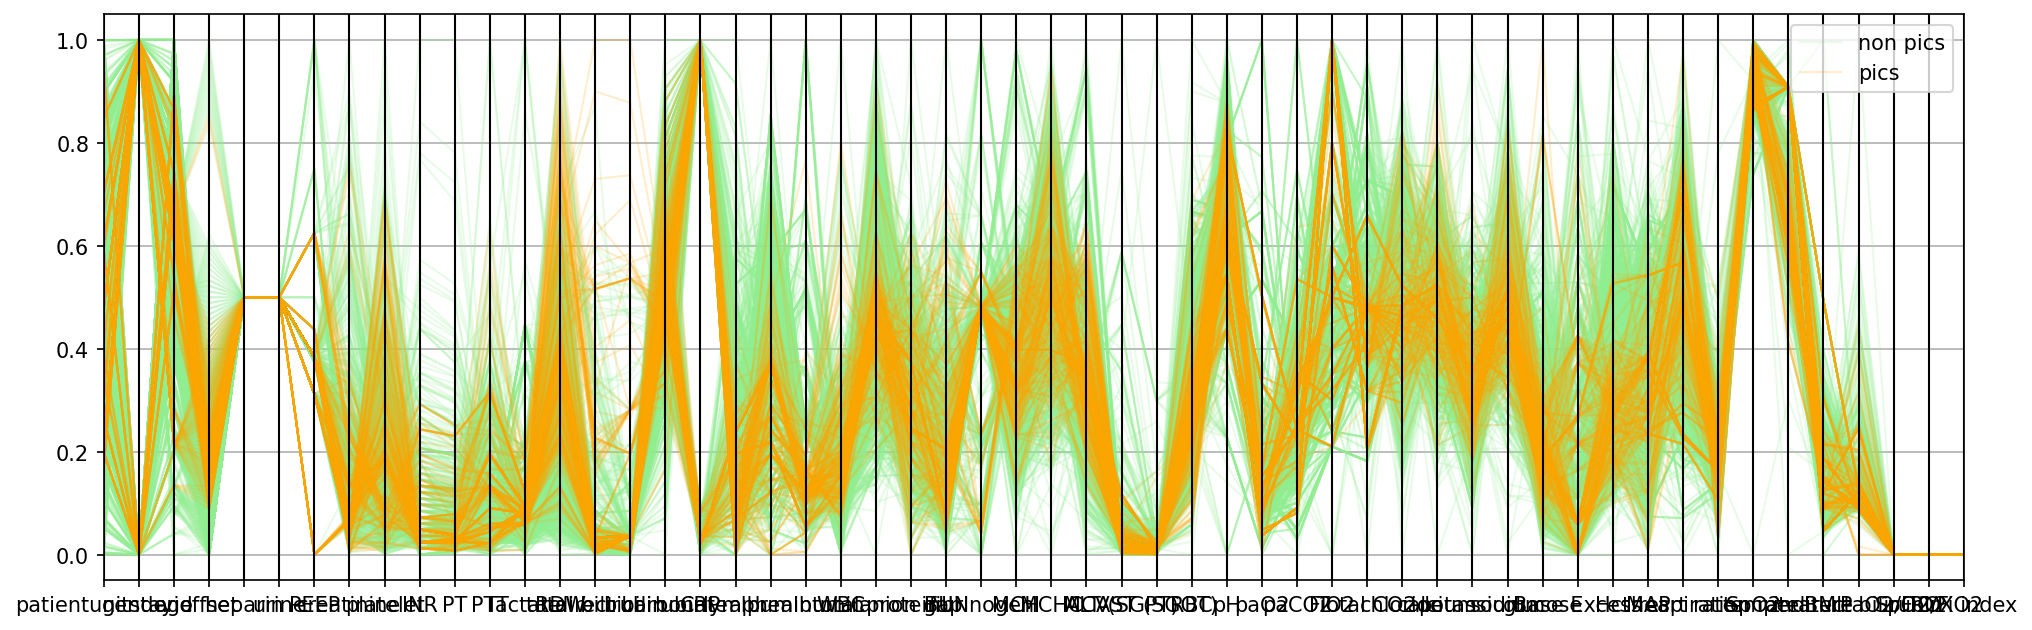

In [14]:
df_visualize = df_full.iloc[:2000, :] \
    .drop(columns=CATEGORICAL_COLUMNS_FULL) \
    .copy()

# map labels
df_visualize[KEY_FLAG] = df_visualize[KEY_FLAG].map(
    lambda v: 'pics' if v else 'non pics'
)

# map data to [0, 1]
for col in df_visualize.columns[:-1]:
    maximum = df_visualize[col].max()
    minimum = df_visualize[col].min()
    delta = maximum - minimum
    if delta == 0:
        df_visualize[col] = 0.5
    else:
        df_visualize[col] = (df_visualize[col] - minimum) / delta

# visualize input data
fig_visualize = plt.figure(figsize=(16, 5), dpi=150)
ax_visualize = fig_visualize.add_subplot()
pd.plotting.parallel_coordinates(
    df_visualize.sort_values(by=KEY_FLAG),
    KEY_FLAG,
    color=['lightgreen', 'orange'],
    alpha=0.2,
    lw=1,
    ax=ax_visualize,
)
